# Acquisition Phase

In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy import stats

import acquire
import prepare

### <font color="blue">The acquire module below uses an env.py file that has my log in info to get the csv file from the Codeup DataBase (db)</font>

In [2]:
# Accessing the file and writing it into a CSV file on my computer

telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


# Preparation Phase

### <font color="blue">The prepare module does the following:
    - drops duplicate columns
    - drops null values that do not affect the outcome of the modeling process
    - Bins the tenure columns for a more succint visualization
    - Converts binary and non-binary categorical variables to numeric through manuak encoding and one-hot encoding
    - Splits the data into train, validate, and test groups</font>

In [3]:
train, validate, test = prepare.prep_telco_data(telco)

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


# Exploration Phase

### <font color="blue">I quickly check for missing values (None or NaN ) and the integrity of the data</font>

In [5]:
# Isna will confirm that I do not have 

train.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [6]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [7]:
# Isna will confirm that I do not have 

validate.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [8]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Isna will confirm that Ido not have 

test.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

There are no nulls in my train, validate, and test datasets

In [10]:
# I put the columns into a list to have the magnitude of the task because the columns are the features

train.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'binned_tenure_2years',
 'binned_tenure_3years',
 'binned_tenure_4years',
 'binned_tenure_5years',
 'binned_tenure_6years',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 's

### <font color="brown">A. Univariate visualizations (visualizing one variable at the time)</font>

### <font color="blue">I check the percentage of churned customers which is the target variable</font>

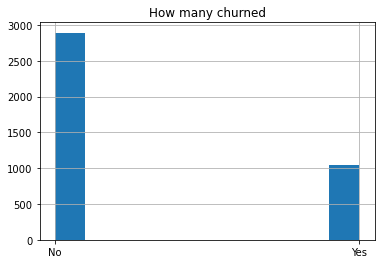

In [11]:
# Plotting a histogram of churn

plt.title('How many churned')
train.churn.hist()
plt.show()

In [12]:
# To get the churn percentage
round(train.churn_encoded.mean(), 2)

0.27

### <font color="blue">And also check the general distribution of all the columns through graph but sometimes statistical measures especially when they are very close or really far apart </font>

<font color="blue">The</font>

- **<font color="brown"> Categorical data</font>**

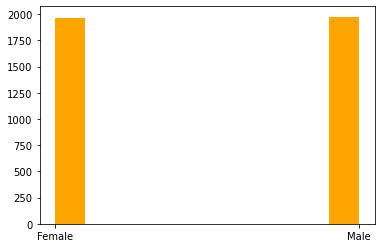

In [13]:
plt.hist(train['gender'], color='orange')
plt.show()

In [14]:
telco.gender.value_counts(normalize=True)*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

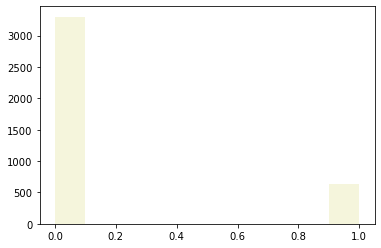

In [15]:
plt.hist(train['senior_citizen'], color='beige')
plt.show()

In [16]:
telco.senior_citizen.value_counts(normalize=True)*100

0    83.785319
1    16.214681
Name: senior_citizen, dtype: float64

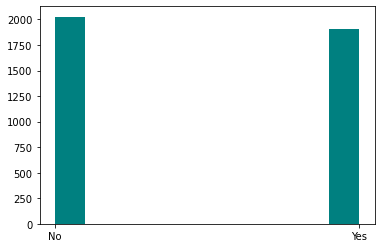

In [17]:
plt.hist(train['partner'], color='teal')
plt.show()

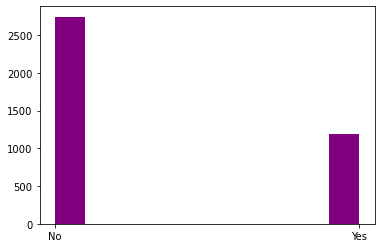

In [18]:
plt.hist(train['dependents'], color='purple')
plt.show()

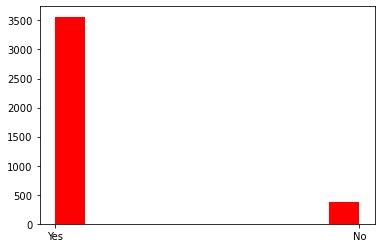

In [19]:
plt.hist(train['phone_service'], color='red')
plt.show()

In [20]:
telco.phone_service.value_counts(normalize=True)*100

Yes    90.316626
No      9.683374
Name: phone_service, dtype: float64

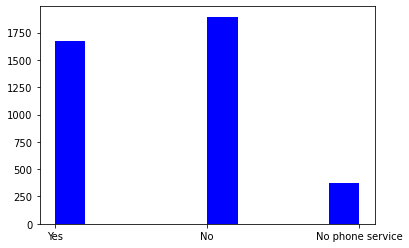

In [21]:
plt.hist(train['multiple_lines'], color='blue')
plt.show()

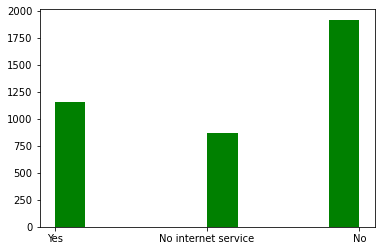

In [22]:
plt.hist(train['online_security'], color='green')
plt.show()

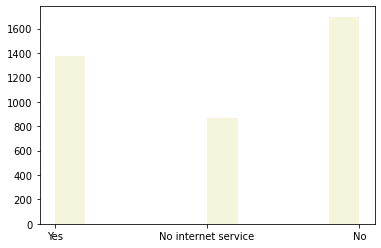

In [23]:
plt.hist(train['online_backup'], color='beige')
plt.show()

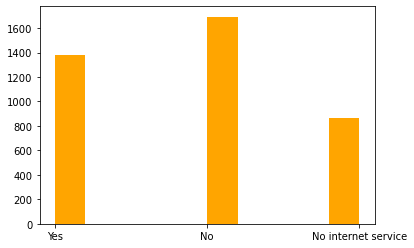

In [24]:
plt.hist(train['device_protection'], color='orange')
plt.show()

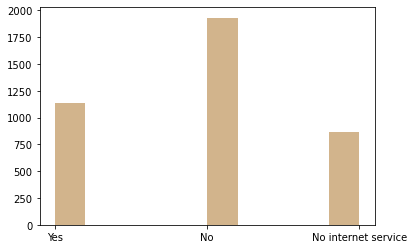

In [25]:
plt.hist(train['tech_support'], color='tan')
plt.show()

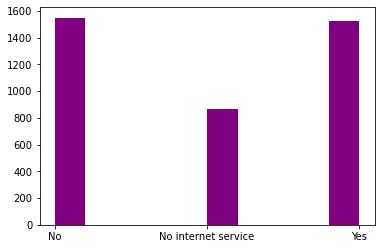

In [26]:
plt.hist(train['streaming_tv'], color='purple')
plt.show()

In [29]:
telco.streaming_tv.value_counts(normalize=True)*100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: streaming_tv, dtype: float64

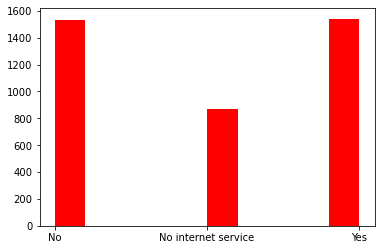

In [31]:
plt.hist(train['streaming_movies'], color='red')
plt.show()

In [30]:
telco.streaming_movies.value_counts(normalize=True)*100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: streaming_movies, dtype: float64

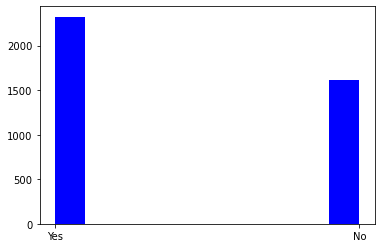

In [32]:
plt.hist(train['paperless_billing'], color='blue')
plt.show()

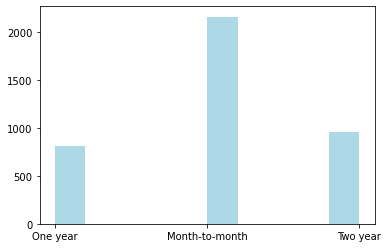

In [33]:
plt.hist(train['contract_type'], color='lightblue')
plt.show()

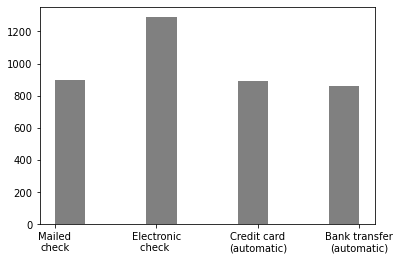

In [34]:
plt.hist(train['payment_type'], color='grey', )
plt.xticks([0, 1, 2, 3], ['Mailed\ncheck', 'Electronic\ncheck ', 'Credit card\n(automatic)', 'Bank transfer\n(automatic)'])
plt.show()

In [35]:
train.payment_type.value_counts(normalize=True)*100

Electronic check             32.740665
Credit card (automatic)      22.733045
Mailed check                 22.631445
Bank transfer (automatic)    21.894844
Name: payment_type, dtype: float64

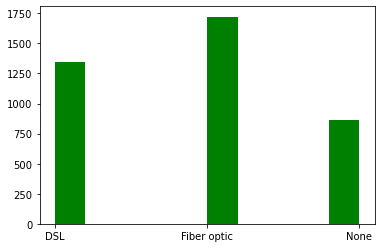

In [36]:
plt.hist(train['internet_service_type'], color='green')
plt.show()

- **<font color="brown"> Numerical data</font>**

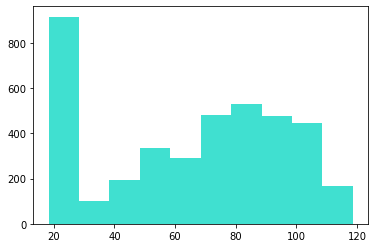

In [37]:
plt.hist(train['monthly_charges'], color='turquoise')
plt.show()

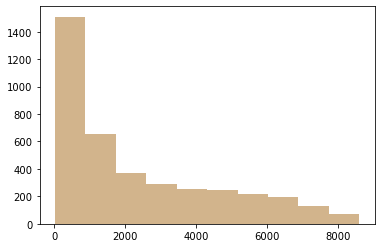

In [38]:
plt.hist(train['total_charges'], color='tan')
plt.show()

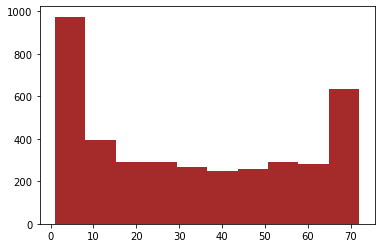

In [39]:
plt.hist(train['tenure'], color='brown')
plt.show()

# <font color="darkblue">Takeaways from Univariate exploration</font>

- Except for gender and partner, the rest of the columns don't have symetric of their values.
The most important uneven ones are:
    * phone service
    * dependent
    * Tenure
    * Monthly charges
    * Paperless billing
    * Contract type
- Tenure and monthly charges have approximately the same distribution
- Streaming TV and Streaming movies are approximately the same

<font color="fuchsia"> - The churn rate is at 27% which is above industry level and warrants a further examination</font>

### B. Bivariate exploration

In [51]:
train.columns[16]

'churn'

### <font color="blue">The big question now would be: who is churning?</font>

In [67]:
def frequency(ds, vars):
    if len(vars) > 1:
        c1 = ds[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(ds[vars[i]])
        dfs = []
        dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0:'Count'}))
        dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'Percent'}))
        dfs = [df.set_index(vars) for df in dfs]
        df = dfs[0].join(dfs[1:]).reset_index()
        return df

In [64]:
frequency(train, ['gender',
                  'senior_citizen', 
                  'partner',
                  'dependents',
                  'tenure',
                  'phone_service',
                  'multiple_lines',
                  'online_security',
                  'online_backup',
                  'device_protection',
                  'tech_support',
                  'streaming_tv',
                  'streaming_movies',
                  'paperless_billing',
                  'monthly_charges',
                  'total_charges',
                  'churn',
                  'contract_type',
                  'internet_service_type',
                  'payment_type',
                  'binned_tenure'])

In [69]:
frequency(train, ['churn',
                  'binned_tenure'])

,churn,binned_tenure,Count,Percent
0,No,1year,639,0.162306
1,Yes,1year,581,0.147574
2,No,2years,386,0.098044
3,Yes,2years,146,0.037084
4,No,3years,367,0.093218
5,Yes,3years,102,0.025908
6,No,4years,347,0.088138
7,Yes,4years,92,0.023368
8,No,5years,391,0.099314
9,Yes,5years,68,0.017272


### Non-Numeric Data

### Gender

In [40]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

gender,Female,Male
churn,,
No,0.498098,0.501902
Yes,0.498088,0.501912


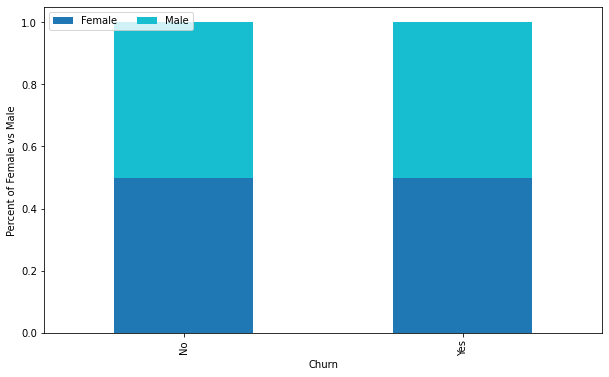

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

### Takeaways
Gender does not seem to have any impact on churn

### Senior Status

In [43]:
churn_senior_ctab = pd.crosstab(index=train.churn, columns=train.senior_citizen, normalize="index")
churn_senior_ctab

senior_citizen,0,1
churn,,
No,0.874092,0.125908
Yes,0.740918,0.259082


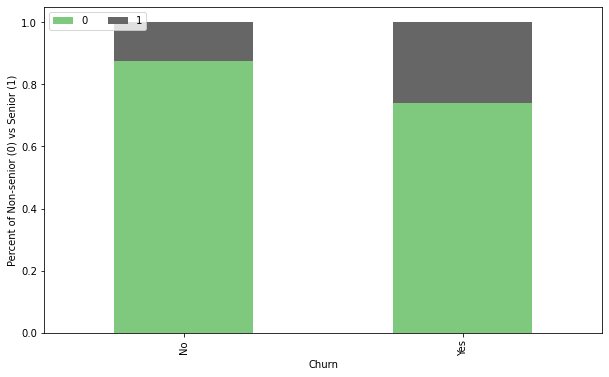

In [81]:
churn_senior_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Non-senior (0) vs Senior (1)")
plt.show()

### Takeaways

Non senior seem to churn more but they are a bigger proprtion of this population

### Partner Status

In [72]:
partner_churn_ctab = pd.crosstab(index=train.churn, columns=train.partner, normalize="index")
partner_churn_ctab

partner,No,Yes
churn,,
No,0.471809,0.528191
Yes,0.633843,0.366157


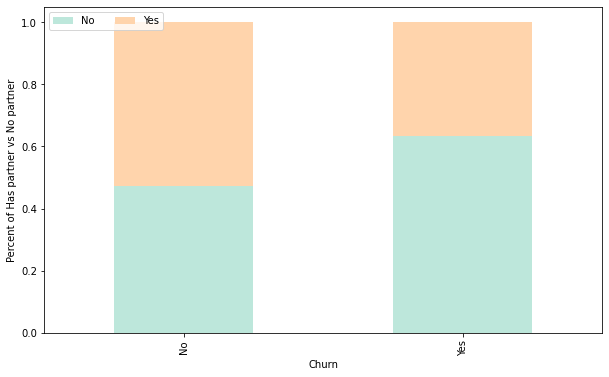

In [84]:
partner_churn_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='icefire', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Has partner vs No partner")
plt.show()

### Takeaways
Those who do not have partners churn more than those who do

### Dependent Status

In [87]:
churn_dependents_ctab = pd.crosstab(index=train.churn, columns=train.dependents, normalize="index")
churn_dependents_ctab

dependents,No,Yes
churn,,
No,0.652024,0.347976
Yes,0.822180,0.177820


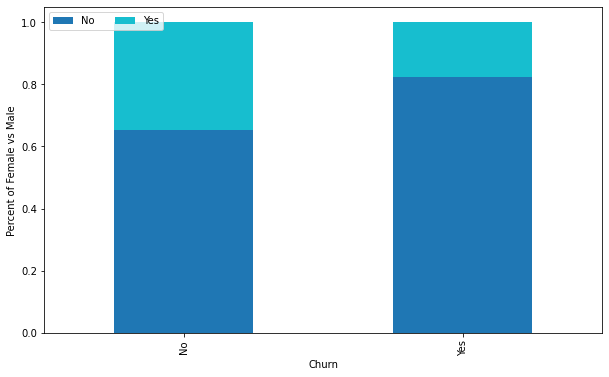

In [88]:
churn_dependents_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

### Takeaways
Those who have a dependent are slightely more likely to churn

### Phone service possession

In [90]:
churn_phone_service_ctab = pd.crosstab(index=train.churn, columns=train.phone_service, normalize="index")
churn_phone_service_ctab

phone_service,No,Yes
churn,,
No,0.097544,0.902456
Yes,0.086998,0.913002


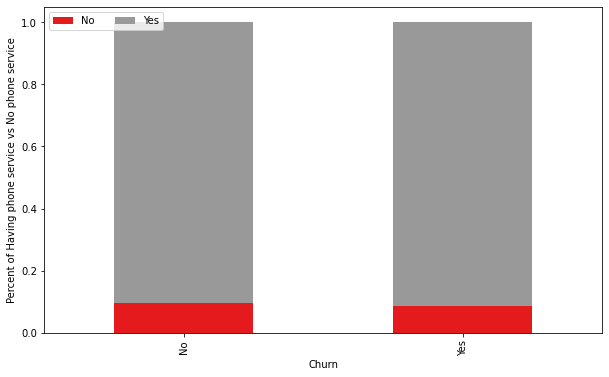

In [97]:
churn_phone_service_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Not having phone service vs Phone service")
plt.show()

### Takeaways
Those who have a phone service churn enormously but as we saw earlier they make up most of the population

### Having multiple lines

In [98]:
churn_multiple_lines_ctab = pd.crosstab(index=train.churn, columns=train.multiple_lines, normalize="index")
churn_multiple_lines_ctab

multiple_lines,No,No phone service,Yes
churn,,,
No,0.494293,0.097544,0.408163
Yes,0.445507,0.086998,0.467495


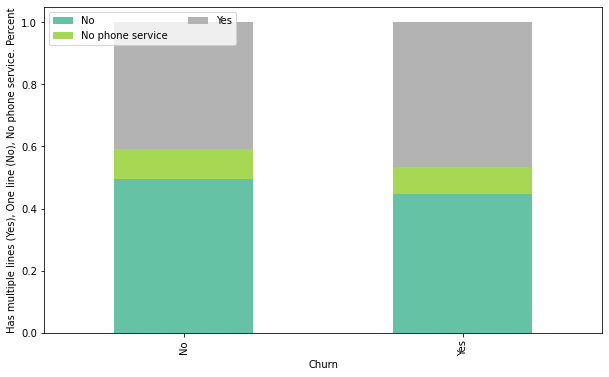

In [100]:
churn_multiple_lines_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Has multiple lines (Yes), One line (No), No phone service. Percent")
plt.show()

### Takeaways
Proportions are pretty equal here

### Online security service

In [102]:
churn_online_security_ctab = pd.crosstab(index=train.churn, columns=train.online_security, normalize="index")
churn_online_security_ctab

online_security,No,No internet service,Yes
churn,,,
No,0.380145,0.277759,0.342096
Yes,0.782983,0.061185,0.155832


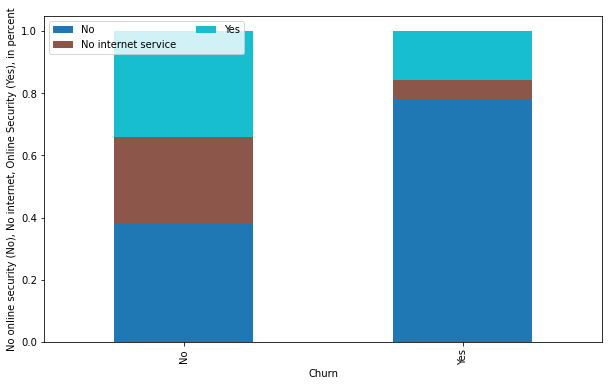

In [104]:
churn_online_security_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("No online security (No), No internet, Online Security (Yes), in percent")
plt.show()

### Takeaways
Those who do not have this service churn the most

### Online backup service

In [105]:
churn_online_backup_ctab = pd.crosstab(index=train.churn, columns=train.online_backup, normalize="index")
churn_online_backup_ctab

online_backup,No,No internet service,Yes
churn,,,
No,0.353857,0.277759,0.368385
Yes,0.644359,0.061185,0.294455


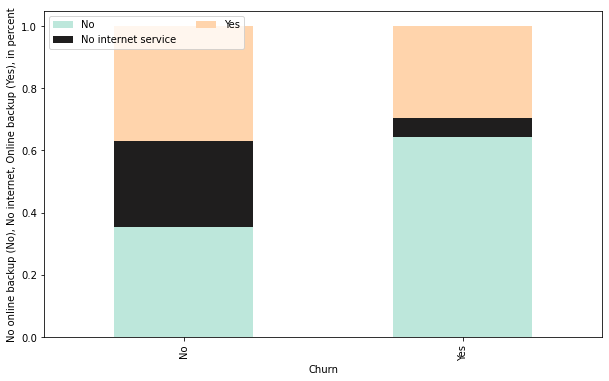

In [107]:
churn_online_backup_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='icefire', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('No online backup (No), No internet, Online backup (Yes), in percent')
plt.show()

### Device protection service

In [108]:
churn_device_protection_ctab = pd.crosstab(index=train.churn, columns=train.device_protection, normalize="index")
churn_device_protection_ctab

device_protection,No,No internet service,Yes
churn,,,
No,0.355240,0.277759,0.367001
Yes,0.636711,0.061185,0.302103


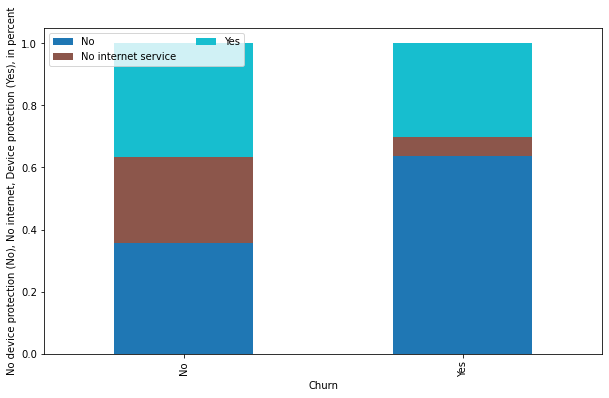

In [109]:
churn_device_protection_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel('No device protection (No), No internet, Device protection (Yes), in percent')
plt.show()

### Takeaways
Those who do not have the service tend to churn more

### Tech support

In [111]:
churn_tech_support_ctab = pd.crosstab(index=train.churn, columns=train.tech_support, normalize="index")
churn_tech_support_ctab

tech_support,No,No internet service,Yes
churn,,,
No,0.389485,0.277759,0.332757
Yes,0.769598,0.061185,0.169216


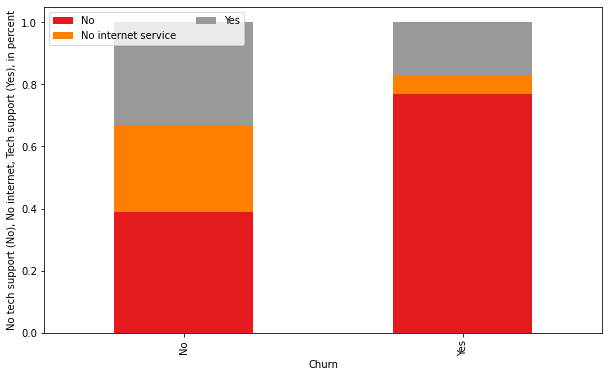

In [118]:
churn_tech_support_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel('No tech support (No), No internet, Tech support (Yes), in percent')
plt.show()

### Takeaways
Those who do not have the service churn at a much higher rate

### Streaming TV

In [114]:
churn_streaming_tv_ctab = pd.crosstab(index=train.churn, columns=train.streaming_tv, normalize="index")
churn_streaming_tv_ctab

streaming_tv,No,No internet service,Yes
churn,,,
No,0.347285,0.277759,0.374957
Yes,0.521033,0.061185,0.417782


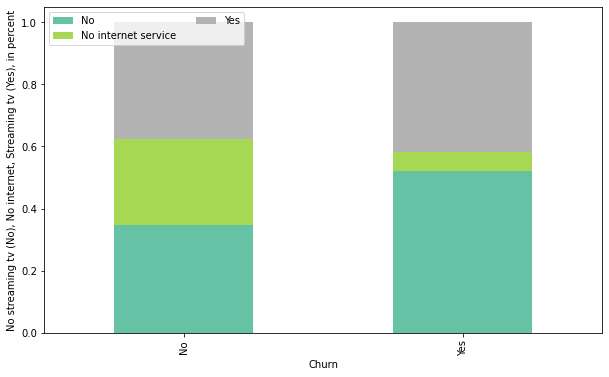

In [119]:
churn_streaming_tv_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('No streaming tv (No), No internet, Streaming tv (Yes), in percent')
plt.show()

### Takeaways
Proportions a pretty similar although those who do not have streaming tv churn a little more

### Streaming movies

In [120]:
churn_streaming_movies_ctab = pd.crosstab(index=train.churn, columns=train.streaming_movies, normalize="index")
churn_streaming_movies_ctab

streaming_movies,No,No internet service,Yes
churn,,,
No,0.345901,0.277759,0.376340
Yes,0.505736,0.061185,0.433078


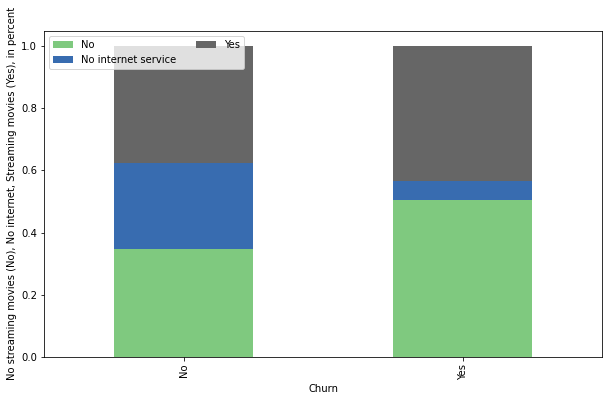

In [121]:
churn_streaming_movies_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel('No streaming movies (No), No internet, Streaming movies (Yes), in percent')
plt.show()

### Takeaways
Proportions a pretty similar although those who do not have streaming movies churn a little more

### Paperless billing option

In [122]:
churn_paperless_billing_ctab = pd.crosstab(index=train.churn, columns=train.paperless_billing, normalize="index")
churn_paperless_billing_ctab

paperless_billing,No,Yes
churn,,
No,0.465929,0.534071
Yes,0.254302,0.745698


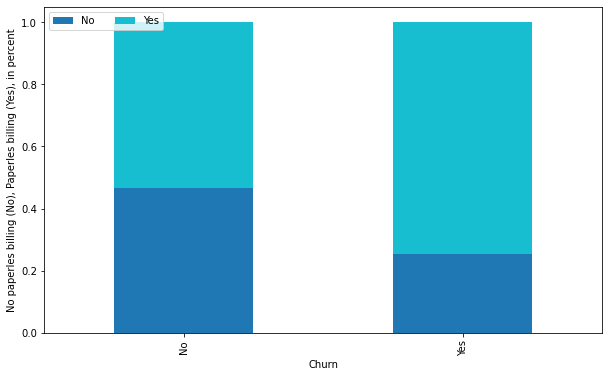

In [123]:
churn_paperless_billing_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel('No paperles billing (No), Paperles billing (Yes), in percent')
plt.show()

### Takeaways
Surprisingly those who have paperless billing churn at a higher rate in this group

Wha??? \uparrow

### The contract type

In [126]:
churn_contract_type_ctab = pd.crosstab(index=train.churn, columns=train.contract_type, normalize="index")
churn_contract_type_ctab

contract_type,Month-to-month,One year,Two year
churn,,,
No,0.428226,0.251124,0.320650
Yes,0.886233,0.085086,0.028681


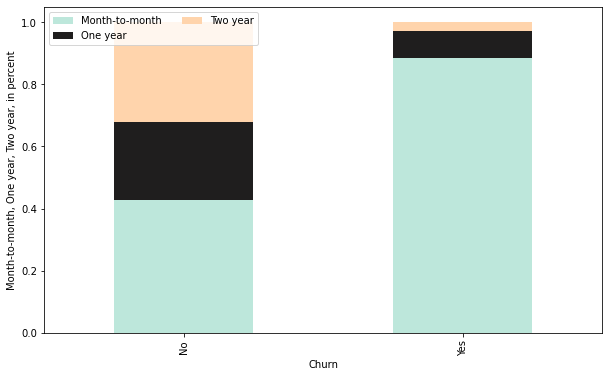

In [129]:
churn_contract_type_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='icefire', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('Month-to-month, One year, Two year, in percent')
plt.show()

### Takeaways
An overwhelmeing number of clients who contract month to month churned

### Internet Service type

In [137]:
churn_internet_service_type_ctab = pd.crosstab(index=train.churn,
                                               columns=train.internet_service_type, normalize="index")
churn_internet_service_type_ctab

internet_service_type,DSL,Fiber optic,None
churn,,,
No,0.380837,0.341404,0.277759
Yes,0.236138,0.702677,0.061185


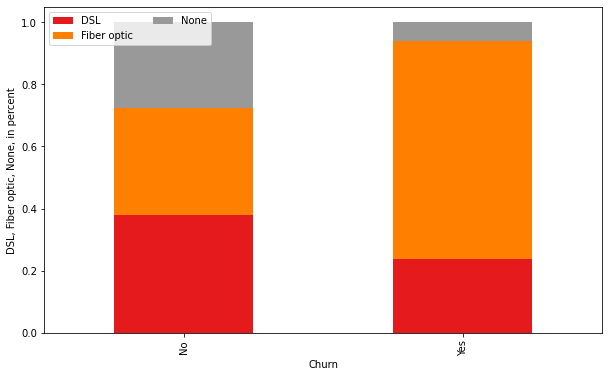

In [132]:
churn_internet_service_type_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('DSL, Fiber optic, None, in percent')
plt.show()

### Takeaways
Clients who receive fiber optic churn much more than the other services

In [134]:
churn_binned_tenure_ctab = pd.crosstab(index=train.churn, columns=train.binned_tenure, normalize="index")
churn_binned_tenure_ctab

binned_tenure,1year,2years,3years,4years,5years,6years
churn,,,,,,
No,0.221031,0.133518,0.126946,0.120028,0.135247,0.263231
Yes,0.555449,0.139579,0.097514,0.087954,0.065010,0.054493


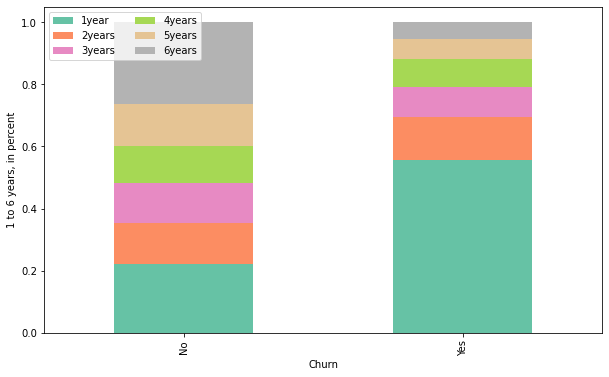

In [149]:
churn_binned_tenure_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('1 to 6 years, in percent')
plt.show()

In [143]:
churn_payment_type_ctab = pd.crosstab(index=train.churn, columns=train.payment_type, normalize="index")
churn_payment_type_ctab

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,0.246627,0.259426,0.244898,0.249049
Yes,0.142447,0.138623,0.555449,0.163480


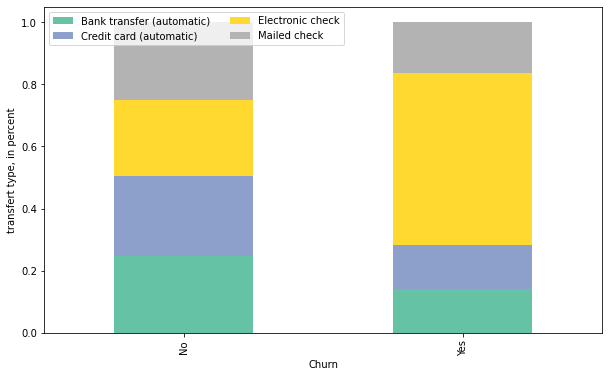

In [147]:
churn_payment_type_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

plt.legend(loc='upper left', ncol=2)
plt.xlabel('Churn')
plt.ylabel('transfert type, in percent')
plt.show()

### Summary of Takeaways of non-numeric data
- Gender does not seem to have any impact on churn, but senior churn more relatively to their numbers

<font color="fuchsia">- It seems as if when customers have certain services they tend to not churn (online backup, device protection, tech support, Streaming tv, streaming movie)</font>
- The following features have a rate of churn > 70% in their respective group: tech support, paperless billingMonth-to-month payment, fiber optic, Binned tenure, Phone service (although those who have a phone service are about 90% of the group), D ependents.

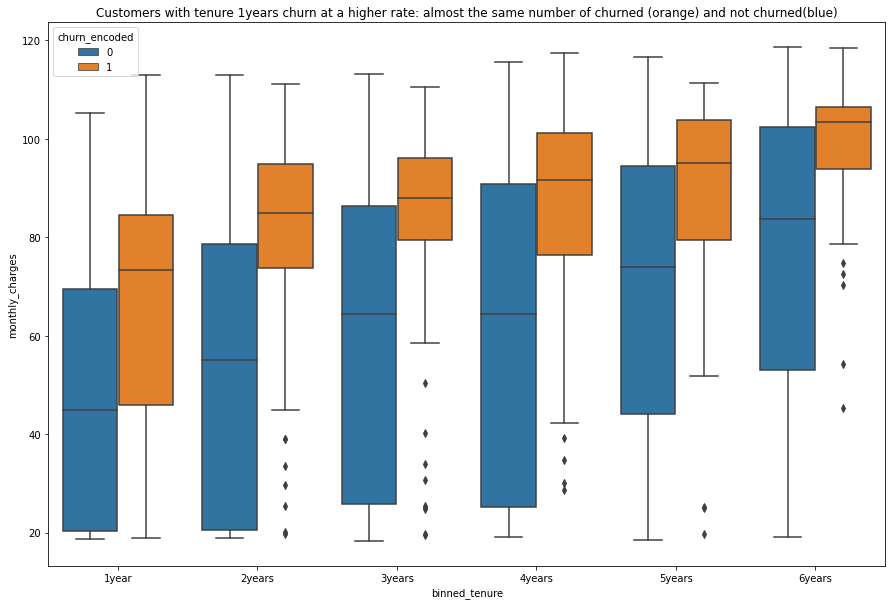

In [198]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate: almost the same number of churned (orange) and not churned(blue)')
sns.boxplot(x='binned_tenure', y='monthly_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

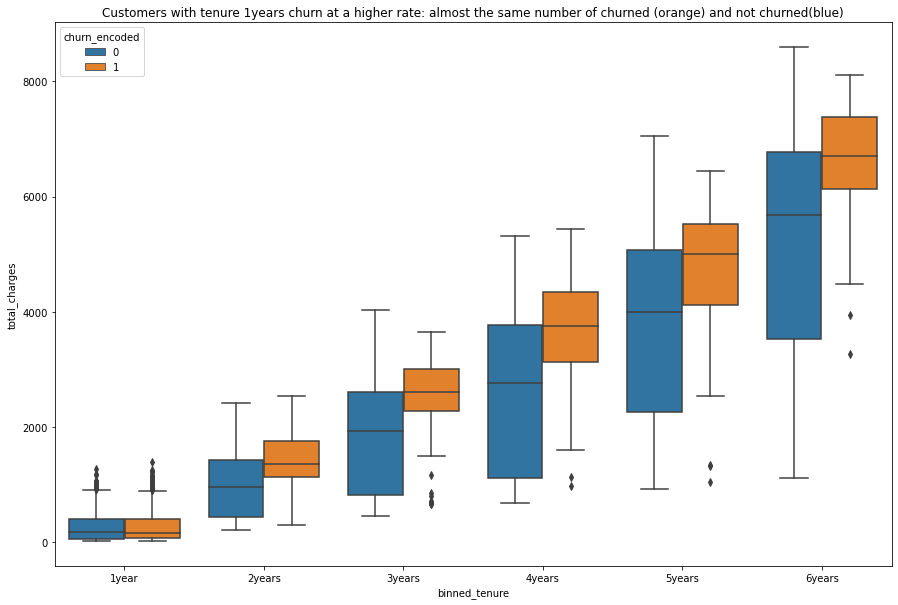

In [197]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate proportionally to other')
sns.boxplot(x='binned_tenure', y='total_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

In [73]:
train.binned_tenure.value_counts()

1year     1220
6years     818
2years     532
3years     469
5years     459
4years     439
Name: binned_tenure, dtype: int64

## Takeaways
- With Monthly charges, We can how customers in the first year churn much more than those in later years
- For Total charges it seems like Customers with tenure 1years churn at a higher rate proportionally to their numbers: almost the same number of churned (orange) and not churned(blue). Meanwhile a greater number of 4, 5, & 6years tenure customers are churning.

<font color="fuchsia">After these takeaways we can wonder to what extent these observation are true and are these features really driving the churn at Telco? Well, let's into some more math to find out!</font>

## <font color="brown">C. Statistical Analysis of Features</font>

To make sure a correlations or a linear relationship exist, I will perform statistical analyses on significant values mentionned in the non-numeric data summary and numerical cata summary.

tech support, paperless billing, Month-to-month payment, fiber optic, Binned tenure, Phone service, dependents

I do not have a normal distribution for tenure nor the other numeric values (monthly charges and total charges)
So I will use a t-test to understand the relationship between these features

**Assumptions**
The churn sample is far larger than 30 data pointsand thus meets the assumptions of normal distributions.

**Of all the features examined, a few stand out because of their level of churn on the graph. I am going to examine these features statistically**

**Selected features**

- Dependents: dependents_encoded
- Phone service: phone_service_encoded
- Tech support: tech_support_Yes
- Paperless billing: paperless_billing_encoded
- Tenure: binned_tenure
- Fiber optic: internet_service_type_Fiber optic
- Monthly charges: monthly_charges
- Contract type (Month-to-month): (train['contract_type'] == 'Month-to-month')

In [152]:
# I set alpha for all calculations

α = .05

**Hypothesis setting**

- Null hypothesis = $H_{0}$
- Alternative hypothesis = $H_{A}$

## Paperless billing

$H_{0}$: Electronic Paperless billing and churn are independent.

$H_{A}$: There is a dependency between Paperless billing and churn.

In [161]:
p_billing_ctab = pd.crosstab(train['paperless_billing_encoded'] , train.churn)
p_billing_ctab

churn,No,Yes
paperless_billing_encoded,,
0,1347,266
1,1544,780


In [163]:
χ2, p_p_billing, degf, expected_p_billing = stats.chi2_contingency(p_billing_ctab)

null_hypothesis = 'Electronic payment and churn are independent'
alternative_hypothesis = 'There is a dependency between Electronic payment and churn'


print(expected_p_billing)
print(f"p value: {p_p_billing}")
print('\n=======================\n')


if p_p_billing < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

[[1184.4508509  428.5491491]
 [1706.5491491  617.4508509]]
p value: 1.3393723943150956e-32


I reject the null hypothesis: There is a dependency between Electronic payment and churn


## Tenure

$H_{0}$: Tenure and churn are independent

$H_{A}$: There is a dependency between the Tenure and churn

In [164]:
b_tenure_ctab = pd.crosstab(train['binned_tenure'] , train.churn)
b_tenure_ctab

churn,No,Yes
binned_tenure,,
1year,639,581
2years,386,146
3years,367,102
4years,347,92
5years,391,68
6years,761,57


In [165]:
χ2, p_bt_check, degf, expected_b_tenure = stats.chi2_contingency(b_tenure_ctab)

null_hypothesis = 'Tenure and churn are independent'
alternative_hypothesis = 'There is a dependency between the Tenure and churn'


print(expected_b_tenure)
print(f"p-val: {p_bt_check}")
print('\n=======================\n')


if p_e_check < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

[[895.86487173 324.13512827]
 [390.65582931 141.34417069]
 [344.39395479 124.60604521]
 [322.36449073 116.63550927]
 [337.0508001  121.9491999 ]
 [600.67005334 217.32994666]]
p-val: 2.6829703056467787e-102


I reject the null hypothesis: There is a dependency between the Tenure and churn


## Fiber optic

$H_{0}$: Fiber optic and churn are independent

$H_{A}$: There is a dependency between Fiber optic and churn

In [167]:
f_optic_ctab = pd.crosstab(train['internet_service_type_Fiber optic'] , train.churn)
f_optic_ctab

churn,No,Yes
internet_service_type_Fiber optic,,
0,1904,311
1,987,735


In [168]:
χ2, p_f_optic, degf, expected_f_optic = stats.chi2_contingency(f_optic_ctab)


null_hypothesis = 'Fiber optic and churn are independent'
alternative_hypothesis = 'There is a dependency between Fiber optic and churn'

print(expected_f_optic)
print(f"p-val: {p_f_optic}")
print('\n=======================\n')


if p_e_check < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

[[1626.50876302  588.49123698]
 [1264.49123698  457.50876302]]
p-val: 2.831419548361709e-90


I reject the null hypothesis: There is a dependency between Fiber optic and churn


## Monthly charges

$H_{0}$: There is no linear correlation between the monthly charges and the rate of churn

$H_{A}$: There is a linear correlation between the monthly charges and the rate of churn

In [172]:
m_charges_ctab = pd.crosstab(train.churn, train.monthly_charges)
m_charges_ctab

monthly_charges,18.25,18.40,18.55,18.75,18.85,18.90,18.95,19.00,19.05,19.10,...,116.60,116.75,116.95,117.35,117.45,117.60,118.20,118.35,118.60,118.65
churn,,,,,,,,,,,,,,,,,,,,,
No,1,1,1,1,3,2,3,3,7,5,...,1,1,1,1,0,1,1,0,2,1
Yes,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [173]:
null_hypothesis = 'There is no correlation between the monthly charges and the rate of churn'
alternative_hypothesis ='There is a correlation between the monthly charges and the rate of churn'

#Using a crosstab of churn to binned tenure

chi2, p_m_charges, degf, expected_m_charges = stats.chi2_contingency(m_charges_ctab)


print(expected_m_charges)
print(f"p-val: {p_m_charges}")
print('\n=======================\n')


if p < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('Fail to reject null hypothesis:', null_hypothesis)

[[0.73431547 0.73431547 0.73431547 ... 0.73431547 1.46863094 0.73431547]
 [0.26568453 0.26568453 0.26568453 ... 0.26568453 0.53136906 0.26568453]]
p-val: 1.7696616579595508e-06


I reject the null hypothesis: There is a correlation between the monthly charges and the rate of churn


## Contract type: Month-to-month

$H_{0}$: there is no relationship between contract type and churn

$H_{A}$: there is a relationship between contract type and churn

In [175]:
null_hypothesis = 'There is no correlation between the Month-to-month Contracts and Churn'
alternative_hypothesis = 'There is a correlation between the Month-to-month Contracts and Churn'

mtm_ctab = pd.crosstab((train['contract_type'] == 'Month-to-month'), train.churn)
chi2, p_mtm_ctab, degf, expected_mtm_ctab = stats.chi2_contingency(mtm_ctab)


print(expected_mtm_ctab)
print(f'p-val: {p_mtm_ctab}')
print('\n=======================\n')


if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

[[1301.20701041  470.79298959]
 [1589.79298959  575.20701041]]
p-val: 3.4484593947893894e-143


I reject the null hypthesis: There is a correlation between the Month-to-month Contracts and Churn


## Tech support 

$H_{0}$: there is no relationship between Tech support and churn

$H_{A}$: there is a relationship between Tech support and churn

In [176]:
null_hypothesis = 'There is correlation between Tech support and Churn'
alternative_hypothesis = 'There is a correlation between Tech support and Churn'

t_support_Y_ctab = pd.crosstab(train['tech_support_Yes'], train.churn)
chi2, p_t_support_Y, degf, expected_t_support_Y = stats.chi2_contingency(t_support_Y_ctab)


print(expected_t_support_Y)
print(f'p-val: {p_t_support_Y}')
print('\n=======================\n')


if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

[[2054.61468123  743.38531877]
 [ 836.38531877  302.61468123]]
p-val: 2.376480997030356e-23


I reject the null hypthesis: There is a correlation between Tech support and Churn


## Dependents

$H_{0}$: there is no relationship between Dependents and churn

$H_{A}$: there is a relationship between Dependents and churn

In [177]:
null_hypothesis = 'There is correlation between Dependents and Churn'
alternative_hypothesis = 'There is a correlation between Dependents and Churn'

d_encoded_ctab = pd.crosstab(train['dependents_encoded'], train.churn)
chi2, p_d_encoded, degf, expected_d_encoded = stats.chi2_contingency(d_encoded_ctab)


print(expected_d_encoded)
print(f'p-val: {p_d_encoded}')
print('\n=======================\n')


if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

[[2015.69596139  729.30403861]
 [ 875.30403861  316.69596139]]
p-val: 1.5385742575781703e-24


I reject the null hypthesis: There is a correlation between Dependents and Churn


## Phone service

$H_{0}$: there is no relationship between Phone service and churn

$H_{A}$: there is a relationship between Phone service and churn

In [178]:
null_hypothesis = 'There is correlation between Phone service and Churn'
alternative_hypothesis = 'There is a correlation between Phone service and Churn'

ps_encoded_ctab = pd.crosstab(train['tech_support_Yes'], train.churn)
chi2, p_ps_encoded, degf, expected_tps_encoded = stats.chi2_contingency(ps_encoded_ctab)


print(expected_tps_encoded)
print(f'p-val: {p_ps_encoded}')
print('\n=======================\n')


if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

[[2054.61468123  743.38531877]
 [ 836.38531877  302.61468123]]
p-val: 2.376480997030356e-23


I reject the null hypthesis: There is a correlation between Phone service and Churn


## Summary Takeaways Graphs and Statistical analysis

- The feature that I detected during the charting phase truly have a correlation to churn.
- For some like Month-to-month, Fiber optic, Tenure, the p value is extremely low
- There is a high number of features and it is necessary to select the most significance to improve my model performance but also avoid overfitting the models
-

# Modeling

In this section, I am trying to predict the customers that will churn.

So, after examining the features through the lens of graphs and running statistical tests on those that appeared to be significant, I will use them to in my train model to predict which customer is likely to churn in the future. 

- Dependents: dependents_encoded
- Phone service: phone_service_encoded
- Tech support: tech_support_Yes
- Paperless billing: paperless_billing_encoded
- Tenure: binned_tenure
- Fiber optic: internet_service_type_Fiber optic
- Monthly charges: monthly_charges
- Contract type (Month-to-month): (train['contract_type'] == 'Month-to-month')

Churn is the target variable and I will focus on churned customers (feature characteristic 1)

To evaluate the model I will use a confusion matrix with the following characteristics:

- TP
    * Prediction = customer will churn
    * Actual = customer churns
- TN
    * Predict = customer will not churn
    * Actual = customer does not churn
- FP
    * Predict = customer will churn
    * Actual = customer does NOT churn
- FN
    * Predict = customer will not churn
    * Actual = customer churns


**<font color="fuchsia">- Objective: Identify customers that will churn</font>**

**<font color="navyblue">* Corresponding indicator: I want an indicator that tells me precisely who will churn but I don't want to predict that someone will not churn but they do churn. So I want to be able to predict well who will churn and who will not churn and ACCURACY is the best indicator for that combined with Recall.</font>**

**<font color="fuchsia">- Positive is set to churn = 1</font>**

## <font color="brown">A. Decision trees</font>

In [180]:
# I am going to first drop all the non numeric columns

non_num = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

train = train.drop(columns=non_num)
train.head()
validate = validate.drop(columns=non_num)
validate.head()
test = test.drop(columns=non_num)
test.head()

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
6330,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
6156,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5313,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1176,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# create X & y version of train, where y is a series with just the target variable
# and X are all the features that I have selected. 

cols_to_drop = ['partner_encoded',
                'gender_encoded',
                'multiple_lines_No phone service',
                'multiple_lines_Yes',
                'online_security_No internet service',
                'online_security_Yes',
                'online_backup_No internet service',
                'online_backup_Yes',
                'device_protection_No internet service',
                'device_protection_Yes',
                'tech_support_No internet service',
                'streaming_tv_No internet service',
                'streaming_tv_Yes',
                'streaming_movies_No internet service',
                'streaming_movies_Yes',
                'internet_service_type_Fiber optic',
                'payment_type_Credit card (automatic)',
                'payment_type_Electronic check',
                'payment_type_Mailed check',
                'internet_service_type_None']


train = train.drop(columns=cols_to_drop)
validate = validate.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [183]:
train.head()

,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,tech_support_Yes,contract_type_One year,contract_type_Two year
5919,0,1,1,0,0,0,0,1,0,1,1,0
1915,1,1,1,0,0,0,0,0,1,0,1,0
5054,1,1,1,0,0,1,0,0,0,0,0,0
2355,1,1,0,0,0,0,0,0,0,0,0,0
6279,0,1,0,0,1,0,0,0,0,1,1,0


In [184]:
validate.head()

,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,tech_support_Yes,contract_type_One year,contract_type_Two year
816,0,1,0,0,0,1,0,0,0,0,0,0
1488,0,1,0,0,0,0,0,0,1,1,0,1
4796,0,0,1,0,0,0,1,0,0,0,1,0
3213,1,1,0,0,0,1,0,0,0,0,0,1
5026,1,1,0,0,0,0,0,0,1,0,0,1


In [185]:
test.head()

,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,tech_support_Yes,contract_type_One year,contract_type_Two year
3311,0,1,0,0,0,1,0,0,0,0,1,0
6330,1,1,0,0,0,1,0,0,0,0,0,1
6156,0,1,0,0,0,0,0,0,0,0,0,0
5313,0,1,0,0,0,1,0,0,0,0,0,0
1176,0,1,0,0,0,1,0,0,0,1,0,0


In [186]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

## Baseline

In [187]:
baseline_model = pd.DataFrame({'actual': y_train})
baseline_model['baseline'] = 0
baseline_confusion_matrix = pd.crosstab(baseline_model.actual, baseline_model.baseline)
baseline_confusion_matrix

baseline,0
actual,
0,2891
1,1046


In [188]:
baseline_accuracy = (baseline_model.baseline == baseline_model.actual).mean()

print(f'Baseline Accuracy: {baseline_accuracy:10%}')

Baseline Accuracy: 73.431547%


### Decision Tree

In [211]:
# Running several other model to see which one has the 

best_result = []
for i in range(2, 30):
    best_depth = DecisionTreeClassifier(max_depth=i, random_state=175)
    best_depth = best_depth.fit(X_train, y_train)
    y_pred = best_depth.predict(X_train)
    report_dt = classification_report(y_train, y_pred, output_dict=True)

    best_result.append(best_depth.score(X_train, y_train))
    best_result_accuracy = max(best_result)
    best_result_num = best_result.index(best_result_accuracy)
    top_train_depth = best_result_num + 1

print('\n*****Winner*****\n')
print(f'The Top Depth is {top_train_depth}')
print(f'Accuracy = {best_result_accuracy:10%}')



*****Winner*****

The Top Depth is 10
Accuracy = 77.470155%


In [202]:
# Running a classification report matrix to find out more

pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2660,231
1,656,390


In [198]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2891
           1       0.63      0.37      0.47      1046

    accuracy                           0.77      3937
   macro avg       0.72      0.65      0.66      3937
weighted avg       0.76      0.77      0.75      3937



### Random Forest

In [233]:
for i in range(2, 20):
    rf = RandomForestClassifier(max_depth=i, random_state=175)
    rf = rf.fit(X_train, y_train)
    y_predictions = rf.predict(X_train)
    report_rf = classification_report(y_train, y_predictions, output_dict=True)

print('\n*****Winner*****\n')
print(f'The Top Depth is {top_train_depth}')
print(f'Accuracy = {best_result_accuracy:10%}')


*****Winner*****

The Top Depth is 10
Accuracy = 77.470155%


### K-Nearest Neighbor

In [241]:
for i in range(1, 10):
            
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    KNeighborsClassifier()
    
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)

    
print('\n*****Winner*****\n')
print(f'The Top Depth is {top_train_depth}')
print(f'Accuracy = {best_result_accuracy:10%}')


*****Winner*****

The Top Depth is 10
Accuracy = 77.470155%


In [242]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2891
           1       0.59      0.48      0.53      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.68      0.69      3937
weighted avg       0.76      0.77      0.76      3937



### Logistic Regression

In [225]:
logit = LogisticRegression(C=1, class_weight='balanced', random_state=175, intercept_scaling=1, solver='lbfgs')
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.3795548   0.20560612  0.81093159 -0.65956874 -0.82540273 -0.51448292
  -0.66022417 -0.77215757 -0.15263819 -1.36530208 -2.47483404]]
Intercept: 
 [0.40419705]


In [ ]:
y_pred_proba = logit.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

In [226]:
print(confusion_matrix(y_train, y_pred))


[[1857 1034]
 [ 184  862]]


In [229]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2891
           1       0.45      0.82      0.59      1046

    accuracy                           0.69      3937
   macro avg       0.68      0.73      0.67      3937
weighted avg       0.79      0.69      0.71      3937



## <font color="brown"> B. Crosscheck with validate</font>

### Decision Tree

In [243]:
print("Model 1: Decision Tree")

print('Accuracy: {:10%}'.format(top_depth.score(X_validate, y_validate)))


y_pred = top_depth.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

Model 1: Decision Tree
Accuracy: 75.829384%
[[1132  107]
 [ 301  148]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1239
           1       0.58      0.33      0.42       449

    accuracy                           0.76      1688
   macro avg       0.69      0.62      0.63      1688
weighted avg       0.73      0.76      0.73      1688



### Random Forest

In [234]:
print("Model 2: Random Forest")

print('Accuracy: {:10%}'.format(rf.score(X_validate, y_validate)))


y_pred = rf.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

Model 2: Random Forest
Accuracy: 75.118483%
[[1120  119]
 [ 301  148]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1239
           1       0.55      0.33      0.41       449

    accuracy                           0.75      1688
   macro avg       0.67      0.62      0.63      1688
weighted avg       0.73      0.75      0.73      1688



### K-NN

In [245]:
print("Model 3: K-NN")

print('Accuracy: {:10%}'.format(knn.score(X_validate, y_validate)))


y_pred = knn.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

Model 3: K-NN
Accuracy: 75.177725%
[[1064  175]
 [ 244  205]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1239
           1       0.54      0.46      0.49       449

    accuracy                           0.75      1688
   macro avg       0.68      0.66      0.67      1688
weighted avg       0.74      0.75      0.74      1688



### Logistic Regression

In [244]:
print("Model 4: Logistic Regression")

print('Accuracy: {:10%}'.format(logit.score(X_validate, y_validate)))


y_pred = logit.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

Model 4: Logistic Regression
Accuracy: 68.898104%
[[792 447]
 [ 78 371]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1239
           1       0.45      0.83      0.59       449

    accuracy                           0.69      1688
   macro avg       0.68      0.73      0.67      1688
weighted avg       0.79      0.69      0.71      1688



**<font color="brown">The best model with the highest ACCURAY and RECALL is: Decision tree model at depth 10</font>**

## <font color="brown">C. Crosscheck with test</font>

In [246]:
y_pred = top_depth.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[940  93]
 [248 126]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1033
           1       0.58      0.34      0.42       374

    accuracy                           0.76      1407
   macro avg       0.68      0.62      0.64      1407
weighted avg       0.73      0.76      0.73      1407



## Prediction CSV FILE

In [ ]:
y_predictions = model.predict(X_test)
y_proba = model.predict_proba(X_test)

predictions = pd.DataFrame({
    "customer_id": test.customer_id, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_predictions,
    "probability_of_churn", y_proba
})

predictions.to_csv("predictions.csv")

# Conclusions

### Final observations
My model performed better than the baseline and could be used to prerdict whether a customer will churn with an accuracy of 76% and a recall of 91%.

Churn is driven by so many variables but it seems that the strongest based on their p value and the percentage od clients churning in their respective group (column) are Month-to-month, Fiber optic, and Tenure

### Recommendations
I would recommend that:
- the offers to the month to month clients be reviewed and a survey run
- in the meantime, the company can offer promotion that will entice clients to stay longer like promotional prices for short bursts of time allowing them to buy two or three months at half or 1/3 of the price
- a further investigation shoulb launch to understand the short-coming of fiber optic.
- It would be valuable to understand what keep customers who have extra services likt tech support, streaming tv and reinforce it and find ways to make it more available for more people.

### Next steps
With additional time, I could:
    - Dig deeper with the Logistic Regression model by carving more features
    - Investigate more feature more wholesomely
    - Run some analysis of the market and the competion to understand the evolution of the market (SWOT & PESTLE analysis, Boston Matrix, )
    - Investigate whether and maybe how Streaming TV and Streaming Movies,  help keep customers from churning and if it could be a good way to keep them
    

**<center><font color="brown">Thank you!</font></center>**